In [186]:
import matplotlib.pyplot as plt
import sympy
import numpy as np
from scipy.integrate import solve_ivp

In [211]:
#initilize the symbols
t = sympy.Symbol('t')
r = sympy.Symbol('r')
theta = sympy.Symbol('theta')
phi = sympy.Symbol('phi')
c = sympy.Symbol('c')
R_s = sympy.Symbol('R_s')
x = [t,r,theta,phi]

#initilize the metric
g = sympy.Matrix([[-c*c*(1-R_s/r),0,0,0],[0,1/(1-R_s/r),0,0],[0,0,r**2,0],[0,0,0,r**2*sympy.sin(theta)**2]])
g_inv = g.inv()

#initilize the christoffel symbols
chris = []
for k in range(4):
    chris.append([])
    for i in range(4):
        chris[k].append([])
        for j in range(4):
            #note that in the case of Schwarzschild metric, g is diagonal, so the christoffel symbols are simplified
            chris[k][i].append(sympy.simplify(0.5*g_inv[k,k]*(sympy.diff(g[k,i],x[j])+sympy.diff(g[k,j],x[i])-sympy.diff(g[i,j],x[k]))))


chris_fun = sympy.lambdify((c, R_s, r, theta), chris, modules="numpy")

In [188]:
Matrix(chris[0])

Matrix([
[                     0, 0.5*R_s/(r*(-R_s + r)), 0, 0],
[0.5*R_s/(r*(-R_s + r)),                      0, 0, 0],
[                     0,                      0, 0, 0],
[                     0,                      0, 0, 0]])

In [189]:
Matrix(chris[1])

Matrix([
[0.5*R_s*c**2*(-R_s + r)/r**3,                     0,               0,                           0],
[                           0, 0.5*R_s/(r*(R_s - r)),               0,                           0],
[                           0,                     0, 1.0*R_s - 1.0*r,                           0],
[                           0,                     0,               0, (R_s - 1.0*r)*sin(theta)**2]])

In [190]:
Matrix(chris[2])

Matrix([
[0,     0,     0,                 0],
[0,     0, 1.0/r,                 0],
[0, 1.0/r,     0,                 0],
[0,     0,     0, -0.5*sin(2*theta)]])

In [191]:
Matrix(chris[3])

Matrix([
[0,     0,              0,              0],
[0,     0,              0,          1.0/r],
[0,     0,              0, 1.0/tan(theta)],
[0, 1.0/r, 1.0/tan(theta),              0]])

In [278]:
#solvable form of the geodesic equation
# return geodesic equation's right hand side
def F(t, y):
    x = np.array(y[0:4])
    xp = np.array(y[4:8])
    right = []
    for i in range(4):
        right.append(sympy.simplify(0))
        for alpha in range(4):
            for beta in range(4):
                right[i] = right[i] - chris_fun(1, 1, x[1], x[2])[i][alpha][beta]*xp[alpha]*xp[beta]
    return np.concatenate((xp, right))

[0.00000000e+00 8.13008130e-03 1.62601626e-02 ... 6.99837398e+01
 6.99918699e+01 7.00000000e+01]
0.0
1.7310315776308648e-05
0.00034620631552617295
0.0005193094732892594
0.0013848252621046918
0.0015386947356718795
0.0017310315776308646
0.0017310315776308646
0.005193094732892594
0.006924126310523459
0.015579284198677781
0.01711797893434966
0.01904134735393951
0.01904134735393951
0.0536619789065568
0.07097229468286545
0.15752387356440867
0.17291082092112747
0.19214450511702597
0.19214450511702597
0.538350820643199
0.7114539784062853
1.5769697672217178
1.7308392407889057
1.9231760827478905
1.9231760827478905
5.38523923800962
7.116270815640485
15.77142870379481
17.31012343946669
19.23349185905654
19.23349185905654
25.564522163747927
28.73003731609362
44.5576130778221
47.371404324351595
50.88864338251348
50.88864338251348
21.333217977809635
22.383081037186184
27.63239633406893
28.565607942403638
29.732122452822026
29.732122452822026
31.831848571575122
32.88171163095167
38.13102692783441
39.0

Text(0, 0.5, 'x')

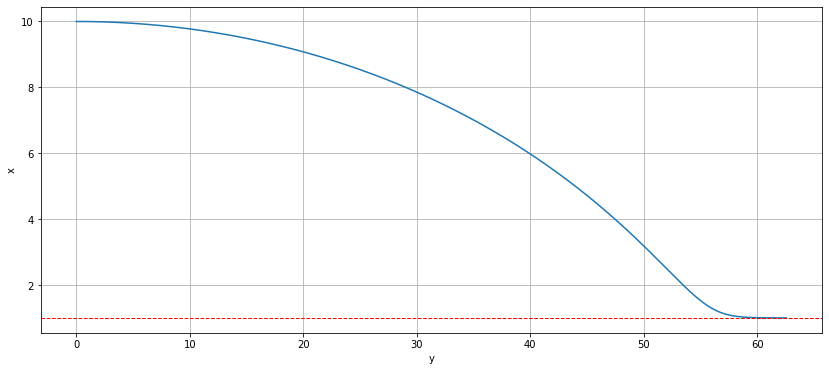

In [280]:
T = 70
t_eval = np.linspace(0, T, int(T * 123 + 1))
print(t_eval)
initial_value = [0, 10, np.pi/2, 0, 1, 0, 0, 0]

# Solve the initial value problem.
sol = solve_ivp(F, [0, T], initial_value, t_eval=t_eval)

# Plot the solution.
plt.figure(figsize=(14, 6),)
plt.plot(sol.y[0], sol.y[1])
ax = plt.gca()
ax.axhline(1, color="red", ls='--', lw=1)
plt.grid()
plt.xlabel('y')
plt.ylabel('x')